In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Central Limit Theorem ##

As its name implies, this theorem is central to the fields of probability, statistics, and data science. It explains the normal curve that kept appearing in the previous section.

As we have seen [earlier](http://prob140.org/textbook/content/Chapter_12/03_Bounds.html#standard-units), a random variable $X$ converted to *standard units* becomes

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

$Z$ measures how far $X$ is from the mean, in units of the SD. In other words $Z$ measures how many SDs above average the value of $X$ is.

By linear function rules, no matter what distribution $X$ has,

$$
E(Z) = 0 ~~~ \text{and} ~~~ SD(Z) = 1
$$

### The Standard Normal Curve ###
Recall from Data 8 that the standard normal curve is defined by a function often denoted by $\phi$, the lower case Greek letter phi.

$$
\phi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2}, ~~~ -\infty < z < \infty
$$

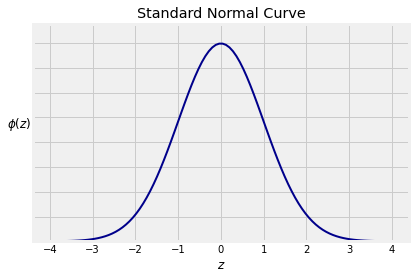

In [2]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0, labelpad = 10)
plt.yticks(np.arange(0, 0.401, 0.05), '')
plt.title('Standard Normal Curve');

The curve is symmetric about $0$. Its points of inflection are at $z=-1$ and $z=1$. You observed this in Data 8 and can prove it by calculus. 

The total area under the curve is $1$. This requires some work to prove. You might have seen it in a calculus class. We will prove it later in the course using probability methods. 

You can think of think of the curve as something resembling the probability histogram of a random variable that has been converted to standard units.

Notice that there is almost no probability outside the range $(-3, 3)$. Recall the following figures from Data 8:

- Area between $-1$ and $1$: about 68%
- Area between $-2$ and $2$: about 95%
- Area between $-3$ and $3$: about 99.73%

### Normal Curves ###

**Terminology:** We will say that the standare normal curve has *location parameter* $0$ and *scale parameter* $1$. In the case of normal distributions we will also use the terms *mean* for the location and *SD* for the scale, by analogy with the mean and SD of a random variable in standard units. This was the terminology you used in Data 8. Later in the course, we will show that the terminology is consistent with definitions of the mean and SD of random variables that have a continuum of possible values.

The standard normal curve is one of a *family* of normal curves, each identified by its location and scale parameters, also known as its mean and SD.

The normal curve with *mean* $\mu$ and *SD* $\sigma$ is defined by

$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}, ~~~ -\infty < x < \infty
$$

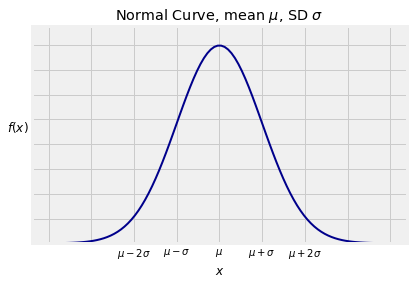

In [3]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0, labelpad = 10)
plt.yticks(np.arange(0, 0.401, 0.05), '')
plt.xticks(np.arange(-4, 4.1), ['','','$\mu-2\sigma$', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$','$\mu+2\sigma$','',''])
plt.title('Normal Curve, mean $\mu$, SD $\sigma$');

The shape looks exactly the same as the standard normal curve. The only difference is in the scales of measurement on the axes. The center is now $\mu$ instead of $0$, and the points of inflection are at a distance of $\sigma$ away from the center instead of $1$.

Now for the reason why the normal curve is important:

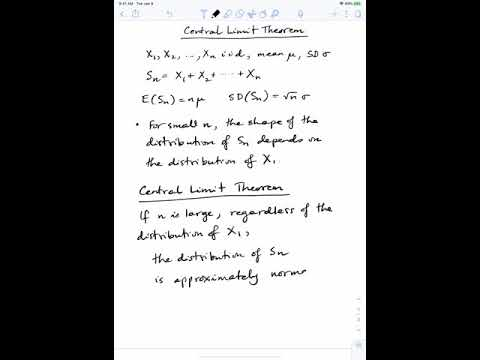

In [4]:
# VIDEO: Central Limit Theorem
from IPython.display import YouTubeVideo

YouTubeVideo('xf7-Cy4JWjE')

### The Central Limit Theorem ###
Let $X_1, X_2, \ldots$ be i.i.d., each with mean $\mu$ and SD $\sigma$. Let $S_n = X_1 + X_2 + \cdots + X_n$. We know that 

$$
E(S_n) = n\mu ~~~~~~~~~~ SD(S_n) = \sqrt{n}\sigma
$$

What we don't yet know is the shape of the distribution of $S_n$. The *Central Limit Theorem* (CLT) tells us the rough shape when $n$ is large.

The ***Central Limit Theorem*** (CLT for short) says that when $n$ is large, the distribution of the standardized sum 

$$
\frac{S_n - n\mu}{\sqrt{n}\sigma}
$$

approximately follows the standard normal curve, regardless of the common distribution of the $X_i$'s.

In other words, 

- When $n$ is large, the distribution of $S_n$ is roughly normal with mean $n\mu$ and SD $\sqrt{n}\sigma$, regardless of the distribution of the $X_i$'s.

The Central Limit Theorem is the primary reason for using the SD as the measure of the spread of a distribution.

Exactly how large $n$ has to be for the approximation to be good does depend on the distribution of $X_i$. We will say more about that later. For now, assume that the sample sizes we are using are large enough for the normal approximation to be reasonable.

A complete proof of this theorem is beyond the scope of this course. A calculation in a later chapter will bring you closer to a proof. For now, just accept it. You have seen plenty of evidence for it in the simulations done in Data 8 and in the exact distributions of sums computed in the previous section.

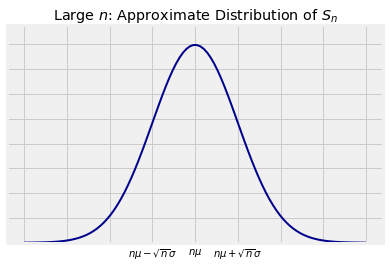

In [5]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.ylabel("")
plt.yticks(np.arange(0, 0.401, 0.05), '')
plt.xticks(np.arange(-4, 4.1), ['','','', '$n\mu - \sqrt{n}\sigma$', '$n\mu$', '$n\mu+\sqrt{n}\sigma$','','', ''])
plt.title('Large $n$: Approximate Distribution of $S_n$');

```{admonition} Quick Check
True or false: The CLT says that the distribution of a large i.i.d. sample is approximately normal.

```

```{admonition} Answer
:class: dropdown
False

```

```{admonition} Quick Check
$X_1, X_2, \ldots, X_{100}$ are i.i.d with mean $60$ and SD $2$. Sketch the approximate distribution of $S_{100} = X_1 + X_2 + \cdots + X_{100}$. Find the numerical values of $E(S_{100})$ and $SD(S_{100})$, and show them appropriately on your sketch.

```

```{admonition} Answer
:class: dropdown
Approximately normal, mean $6000$, SD $20$. One way to show the SD is to label $6020$, one of the points of inflection.

```

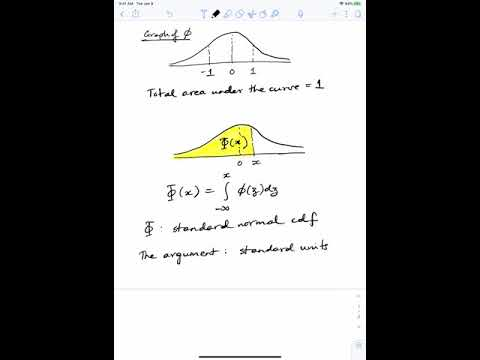

In [6]:
# VIDEO: Probabilities and the Standard Normal Curve

YouTubeVideo('ufuTZYneoJc')

### The Standard Normal CDF $\Phi$ ###

There is really only one normal curve that matters – the standard normal curve. All the others are obtained by linear transformations of the horizontal axis. Therefore areas under normal curves can be found by converting to standard units and using the standard normal curve.

The *standard normal cdf* is a function whose value at $x$ is all the area to the left of $x$ under the standard normal curve $\phi$.

A common notation for the standard normal cdf is the upper case letter $\Phi$, because it is the integral of $\phi$.

$$
\Phi(x) = \int_{-\infty}^x \phi(z)dz ~, ~~~~ -\infty < x < \infty
$$

Note that at this stage of the course, the term *standard normal cdf* is being used only by analogy with the concept of a discrete cdf. In the next chapter we will show that the standard normal cdf is the cdf of a random variable that has values on the entire real line.

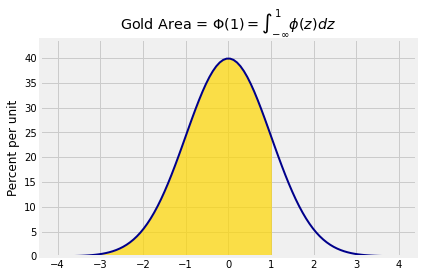

In [7]:
Plot_norm([-4,4], 0, 1, right_end=1)
plt.title('Gold Area = $\Phi(1) = \int_{-\infty}^1 \phi(z)dz$');

For each $x$, the integral that defines $\Phi(x)$ is finite. But it does not have a closed form formula that can be written in terms of arithmetic operations, powers, trigonometric functions, exponential and logarithmic functions, composition, and other mathematical operations. It has to be approximated by numerical integration. That is why every statistical system has a built-in function that provides excellent approximations. In the next section we will use the function provided in `SciPy`.

Standardizing and the standard normal cdf $\Phi$ together provide a compact notation for areas under all normal curves. We don't have to use different functions for different values of the parameters.

For example, under the assumptions of the CLT, for large $n$ we have the approximation

$$
P(S_n \le x) ~ \approx ~ \Phi \big{(} \frac{x - n\mu}{\sqrt{n}\sigma} \big{)} ~~~ \text{for all } x
$$

As you saw in Data 8, approximations often don't do well in the tails of distributions. If you use the CLT to approximate probabilities of regions that are in the tails, be aware that the approximations might be very rough.

### Approximating the Binomial $(n, p)$ Distribution ###

A binomial $(n, p)$ random variable is the sum of $n$ i.i.d. indicators. If $n$ is large, the CLT says the distribution should be roughly normal, no matter what $p$ is. But we said in Chapter 6 that if $n$ is large and $p$ is small, then the binomial distribution is roughly Poisson.

So which is it: normal or Poisson? 

Here are two binomial histograms, both of which have large $n$ but rather different shapes.

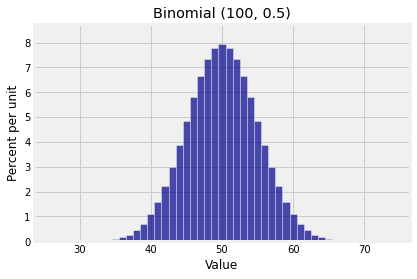

In [8]:
k1 = np.arange(25, 76)
probs1 = stats.binom.pmf(k1, 100, 0.5)
binom_fair = Table().values(k1).probabilities(probs1)
Plot(binom_fair)
plt.title('Binomial (100, 0.5)');

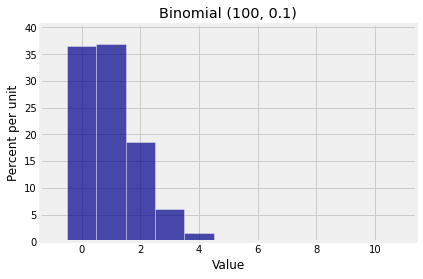

In [9]:
k2 = np.arange(0, 11)
probs2 = stats.binom.pmf(k2, 100, 0.01)
binom_biased = Table().values(k2).probabilities(probs2)
Plot(binom_biased)
plt.title('Binomial (100, 0.1)');

The difference arises due to the spread of the distributions. The Poisson approximation applies when $p$ is small and the binomial distribution is scrunched up near $0$. When the spread is larger so that there are a substantial number of possible values on either side of the mean, then the normal approximation is the one to try.

To quantify this, many texts give a *rough threshold* depending on $n$ and $p$ so that if $n$ larger than the threshold then the binomial $(n, p)$ distribution is roughly normal. If $n$ is large and the binomial distribution resembles a Poisson, that means $n$ hasn't yet crossed the threshold for the normal approximation to be good.

The threshold is variously stated as "the SD $\sqrt{npq}$ is greater than 3" or "both $np$ and $nq$ are greater than 10", which are not exactly the same but pretty close. 

You can see what you think of these guidelines, by comparing the total variation distance between the binomial and the corresponding Poisson and the total variation distance between the binomial and the corresponding normal. However, in this course the choice of the normal versus the Poisson approximation to the binomial is rarely going to be a problem, because when the values of $n$ and $p$ are such that you have a doubt about which to use, then you are just going to use the exact binomial probabilities.

Here is the binomial $(100, 0.5)$ distribution and the approximating normal curve. The parameters of the curve are $np = 50$ and $\sqrt{npq} = 5$.

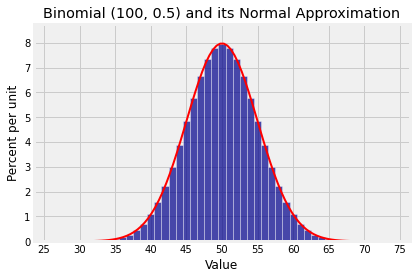

In [10]:
Plot(binom_fair)
Plot_norm((25, 75), 50, 5, color='red')
plt.xticks(np.arange(25, 76, 5))
plt.title('Binomial (100, 0.5) and its Normal Approximation');

Notice how the points "$\mbox{mean } \pm \mbox{ SD}$" $= 50 \pm 5$ are the points of inflection of the curve. 

```{admonition} Quick Check
Answer yes or no to each question below.

(a) Is the binomial $(100, 0.01)$ distribution approximately normal?

(b) Is the binomial $(10000, 0.01)$ distribution approximately normal?

```

```{admonition} Answer
:class: dropdown

(a) No

(b) Yes
